In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#import file
df = pd.read_csv('~/desktop/jt/new-lotr-housing-sales.csv',parse_dates=[6],infer_datetime_format=True)

In [4]:
#inspect null
df.isnull().sum()

epoch.of.history      0
address               0
area                  0
dwelling.type         0
dwell.sub.type        0
tax.class             0
sale.date           155
sale.price            0
year.built            0
number.of.units     233
land.area           233
building.area       233
dtype: int64

In [5]:
#filter null row from date and fill 0 on others
df2 = df[df['sale.date'].notna()]
df2 = df.fillna(0)

In [6]:
#check dtype, need to convert datetime
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139658 entries, 0 to 139657
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   epoch.of.history  139658 non-null  object 
 1   address           139658 non-null  object 
 2   area              139658 non-null  object 
 3   dwelling.type     139658 non-null  object 
 4   dwell.sub.type    139658 non-null  object 
 5   tax.class         139658 non-null  object 
 6   sale.date         139658 non-null  object 
 7   sale.price        139658 non-null  int64  
 8   year.built        139658 non-null  int64  
 9   number.of.units   139658 non-null  float64
 10  land.area         139658 non-null  float64
 11  building.area     139658 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 12.8+ MB


In [7]:
# get sale year from saledate
year = df2['sale.date'].str[-4:]
df2['sale_year'] = year

df2.head()

,epoch.of.history,address,area,dwelling.type,dwell.sub.type,tax.class,sale.date,sale.price,year.built,number.of.units,land.area,building.area,sale_year
0,Fourth Age,2206 Mandos Way,Minas Tirith,One Family,Human house,A1,20/02/1241,300000,1131,1.0,1103.0,1290.0,1241
1,Fourth Age,4312 W Rauros Circle,Minas Tirith,One Family,Hobbit hole,S1,01/07/1241,400000,1131,1.0,2500.0,2452.0,1241
2,Fourth Age,2504 Harad Circle,Minas Tirith,One Family,Human house,S0,06/01/1241,510000,1152,1.0,1911.0,4080.0,1241
3,Fourth Age,1087 Moria Circle,Minas Tirith,Two Family,Hobbit hole,B1,04/08/1241,430000,1214,2.0,2000.0,2400.0,1241
4,Fourth Age,1904 Túna Street,Minas Tirith,Two Family,Hobbit hole,B1,29/01/1241,389000,1216,2.0,2451.0,2394.0,1241


In [8]:
#clean up sale year
df2 = df2[df2['sale_year'].notna()]
df2 = df2.fillna(0)

#change year to integer
df2['sale_year']= df2.sale_year.astype(int)

In [9]:
#get property age when it was sold
df2['age_when_sale'] = df2['sale_year'] - df2['year.built']

In [10]:
#group how old is the apartment when it was sold
df2['age'] = np.where(df2['age_when_sale']<=10, 'new', 
np.where(df2['age_when_sale']<=19, 'not_so_new', 
np.where(df2['age_when_sale']<=49, 'old',
np.where(df2['age_when_sale']<=150, 'older',
np.where(df2['age_when_sale']<=200, 'very_old',
np.where(df2['age_when_sale']>200, 'super_old', 'do_not_know'))))))

df2

,epoch.of.history,address,area,dwelling.type,dwell.sub.type,tax.class,sale.date,sale.price,year.built,number.of.units,land.area,building.area,sale_year,age_when_sale,age
0,Fourth Age,2206 Mandos Way,Minas Tirith,One Family,Human house,A1,20/02/1241,300000,1131,1.0,1103.0,1290.0,1241,110,older
1,Fourth Age,4312 W Rauros Circle,Minas Tirith,One Family,Hobbit hole,S1,01/07/1241,400000,1131,1.0,2500.0,2452.0,1241,110,older
2,Fourth Age,2504 Harad Circle,Minas Tirith,One Family,Human house,S0,06/01/1241,510000,1152,1.0,1911.0,4080.0,1241,89,older
3,Fourth Age,1087 Moria Circle,Minas Tirith,Two Family,Hobbit hole,B1,04/08/1241,430000,1214,2.0,2000.0,2400.0,1241,27,old
4,Fourth Age,1904 Túna Street,Minas Tirith,Two Family,Hobbit hole,B1,29/01/1241,389000,1216,2.0,2451.0,2394.0,1241,25,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139653,Fourth Age,3913 Window-Curtain Road,Ciril,Two Family,Orc lair,B9,23/04/1246,665000,1219,2.0,2590.0,1850.0,1246,27,old
139654,Fourth Age,564 Lands Without Circle,Ciril,Two Family,Elf house,B2,10/11/1246,775000,1221,2.0,5235.0,2400.0,1246,25,old
139655,Fourth Age,2807 Girdley Island Road,Ciril,Two Family,Orc lair,B9,18/06/1246,500000,1222,2.0,2385.0,2250.0,1246,24,old
139656,Fourth Age,400 Cirith Dúath Parkway,Ciril,Two Family,Human house,B9,25/09/1246,537000,1222,2.0,2728.0,1980.0,1246,24,old


In [11]:
#calulate mean of sale price partitioned by multiple variables
df2_marketmean = df2.groupby(['area','sale_year','dwell.sub.type','dwelling.type','tax.class','age'])['sale.price'].mean().reset_index()
df2_marketmean

,area,sale_year,dwell.sub.type,dwelling.type,tax.class,age,sale.price
0,Anghabar,1241,Elf house,One Family,A0,older,6.375000e+05
1,Anghabar,1241,Elf house,One Family,A1,new,4.000000e+05
2,Anghabar,1241,Elf house,One Family,A1,not_so_new,6.850000e+05
3,Anghabar,1241,Elf house,One Family,A1,old,1.450000e+06
4,Anghabar,1241,Elf house,One Family,A1,older,7.849864e+05
...,...,...,...,...,...,...,...
9830,Wold of Rohan,1246,Orc lair,Two Family,B2,old,6.750000e+05
9831,Wold of Rohan,1246,Orc lair,Two Family,B2,older,1.356829e+06
9832,Wold of Rohan,1246,Orc lair,Two Family,B3,older,1.042161e+06
9833,Wold of Rohan,1246,Orc lair,Two Family,B9,older,1.143750e+06


In [12]:
#create concat column to join on df2_marketmean
df2_marketmean['concat6var'] = df2_marketmean['area'] + df2_marketmean['sale_year'].astype(str) + df2_marketmean['dwell.sub.type'] + df2_marketmean['dwelling.type']+df2_marketmean['tax.class']+df2_marketmean['age']
df2_marketmean

,area,sale_year,dwell.sub.type,dwelling.type,tax.class,age,sale.price,concat6var
0,Anghabar,1241,Elf house,One Family,A0,older,6.375000e+05,Anghabar1241Elf houseOne FamilyA0older
1,Anghabar,1241,Elf house,One Family,A1,new,4.000000e+05,Anghabar1241Elf houseOne FamilyA1new
2,Anghabar,1241,Elf house,One Family,A1,not_so_new,6.850000e+05,Anghabar1241Elf houseOne FamilyA1not_so_new
3,Anghabar,1241,Elf house,One Family,A1,old,1.450000e+06,Anghabar1241Elf houseOne FamilyA1old
4,Anghabar,1241,Elf house,One Family,A1,older,7.849864e+05,Anghabar1241Elf houseOne FamilyA1older
...,...,...,...,...,...,...,...,...
9830,Wold of Rohan,1246,Orc lair,Two Family,B2,old,6.750000e+05,Wold of Rohan1246Orc lairTwo FamilyB2old
9831,Wold of Rohan,1246,Orc lair,Two Family,B2,older,1.356829e+06,Wold of Rohan1246Orc lairTwo FamilyB2older
9832,Wold of Rohan,1246,Orc lair,Two Family,B3,older,1.042161e+06,Wold of Rohan1246Orc lairTwo FamilyB3older
9833,Wold of Rohan,1246,Orc lair,Two Family,B9,older,1.143750e+06,Wold of Rohan1246Orc lairTwo FamilyB9older


In [13]:
#create concat column to join on df2
df2['concat6var'] = df2['area'] + df2['sale_year'].astype(str) + df2['dwell.sub.type'] + df2['dwelling.type']+df2['tax.class']+df2['age']


In [14]:
#left join df2 and df2_marketmean
pd2_join=pd.merge(df2,df2_marketmean,on='concat6var',how ='left')

In [15]:
#create new column to identify undervalued property
pd2_join['undervalue_ornot'] = np.where(pd2_join['sale.price_x']<pd2_join['sale.price_y'], 'undervalue', 
np.where(pd2_join['sale.price_x']>pd2_join['sale.price_y'], 'overvalue', 'at market value'))


In [16]:
#count each group of value
df3 = pd2_join.groupby(['undervalue_ornot'], sort=False).size().reset_index(name='Count')
print (df3)

  undervalue_ornot  Count
0       undervalue  72820
1  at market value   2698
2        overvalue  63985


In [18]:
#get percentage of how much undervalued or overvalue each property was
pd2_join['overvalued_percentage'] = ((pd2_join['sale.price_x'] - pd2_join['sale.price_y'])/pd2_join['sale.price_x'])*100


In [20]:
#list top 10 area with most undervalued properties

df3=(pd2_join['overvalued_percentage'] < 0).sum().sum()
df3= pd2_join.groupby(['area_x'], sort=False).size().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
df3

,area_x,count
27,Ciril,17016
7,South Gondor,11249
23,Parth Galen,10932
1,Gondor,10907
26,Faskala-númen,10140
21,Nan Curunír,9359
4,Wold of Rohan,9299
6,Gap of Rohan,9297
19,Emerië,8518
5,Mountains of Mirkwood,8199


In [125]:
#get absolute value of money to gain if sell the 'Undervalued' property at market price
pd2_join['gain_after_renovate'] = pd2_join['sale.price_y'] - pd2_join['sale.price_x']
pd2_join['gain_after_renovate'] = np.where(pd2_join['gain_after_renovate']<0, 0, pd2_join['gain_after_renovate'])
pd2_join

,epoch.of.history,address,area_x,dwelling.type_x,dwell.sub.type_x,tax.class_x,sale.date,sale.price_x,year.built,number.of.units,...,area_y,sale_year_y,dwell.sub.type_y,dwelling.type_y,tax.class_y,age_y,sale.price_y,undervalue_ornot,overvalued_percentage,gain_after_renovate
0,Fourth Age,2206 Mandos Way,Minas Tirith,One Family,Human house,A1,20/02/1241,300000,1131,1.0,...,Minas Tirith,1241,Human house,One Family,A1,older,326992.307692,undervalue,-8.997436,26992.307692
1,Fourth Age,4312 W Rauros Circle,Minas Tirith,One Family,Hobbit hole,S1,01/07/1241,400000,1131,1.0,...,Minas Tirith,1241,Hobbit hole,One Family,S1,older,473333.333333,undervalue,-18.333333,73333.333333
2,Fourth Age,2504 Harad Circle,Minas Tirith,One Family,Human house,S0,06/01/1241,510000,1152,1.0,...,Minas Tirith,1241,Human house,One Family,S0,older,510000.000000,at market value,0.000000,0.000000
3,Fourth Age,1087 Moria Circle,Minas Tirith,Two Family,Hobbit hole,B1,04/08/1241,430000,1214,2.0,...,Minas Tirith,1241,Hobbit hole,Two Family,B1,old,416933.333333,overvalue,3.038760,0.000000
4,Fourth Age,1904 Túna Street,Minas Tirith,Two Family,Hobbit hole,B1,29/01/1241,389000,1216,2.0,...,Minas Tirith,1241,Hobbit hole,Two Family,B1,old,416933.333333,undervalue,-7.180805,27933.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139498,Fourth Age,3913 Window-Curtain Road,Ciril,Two Family,Orc lair,B9,23/04/1246,665000,1219,2.0,...,Ciril,1246,Orc lair,Two Family,B9,old,567275.555556,overvalue,14.695405,0.000000
139499,Fourth Age,564 Lands Without Circle,Ciril,Two Family,Elf house,B2,10/11/1246,775000,1221,2.0,...,Ciril,1246,Elf house,Two Family,B2,old,752985.000000,overvalue,2.840645,0.000000
139500,Fourth Age,2807 Girdley Island Road,Ciril,Two Family,Orc lair,B9,18/06/1246,500000,1222,2.0,...,Ciril,1246,Orc lair,Two Family,B9,old,567275.555556,undervalue,-13.455111,67275.555556
139501,Fourth Age,400 Cirith Dúath Parkway,Ciril,Two Family,Human house,B9,25/09/1246,537000,1222,2.0,...,Ciril,1246,Human house,Two Family,B9,old,602300.964286,undervalue,-12.160329,65300.964286


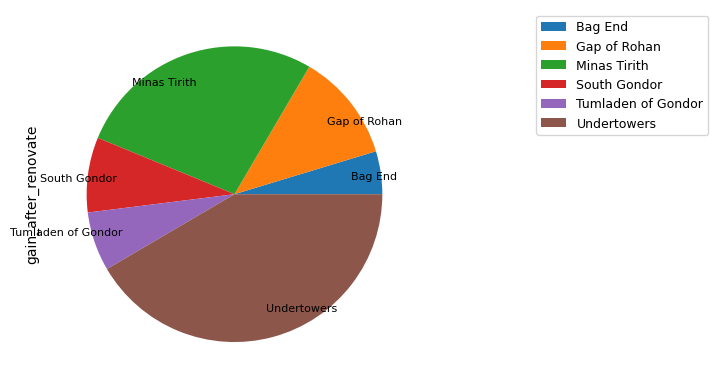

In [168]:
top_area_gain=pd2_join.sort_values(['gain_after_renovate'], ascending=False).head(20)

top_area_gain.groupby(['area_x']).sum().plot(kind='pie', y='gain_after_renovate',labeldistance=0.8, fontsize=8)

plt.legend(bbox_to_anchor=(1.3,1), loc="upper left", fontsize=9)



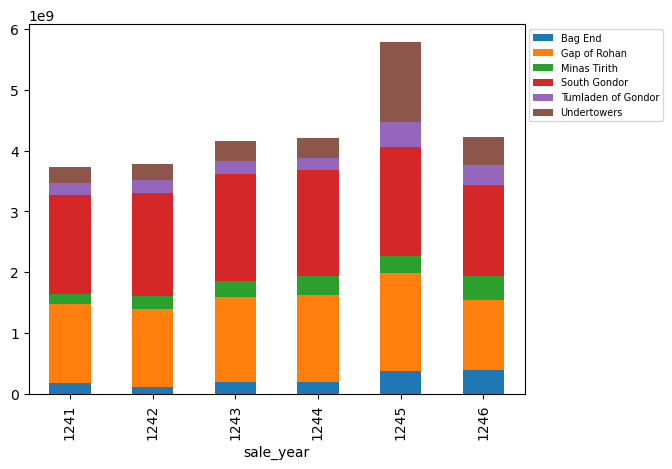

In [155]:
#market outlook of top area with renovation opportunities
marketoutlook=df2[['area','sale_year','sale.price']]
marketoutlook=marketoutlook.sort_values(['sale.price'], ascending=False)
marketoutlook.reset_index(inplace=True)
marketoutlook=marketoutlook[marketoutlook['area'].str.contains("Minas|Undertower|South Gondor|Gap of Rohan|Bag End|Tumladen of Gondor")==True]

marketoutlook.groupby(['sale_year','area']).sum().unstack().plot(kind='bar',y='sale.price', stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=7)


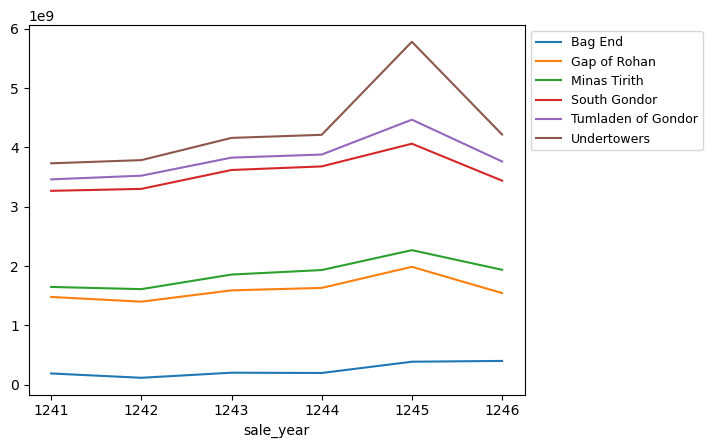

In [27]:
#check market outlook of top areas with renovation opportunities
marketoutlook=df2[['area','sale_year','sale.price']]
marketoutlook=marketoutlook.sort_values(['sale.price'], ascending=False)
marketoutlook.reset_index(inplace=True)
marketoutlook=marketoutlook[marketoutlook['area'].str.contains("Minas|Undertower|South Gondor|Gap of Rohan|Bag End|Tumladen of Gondor")==True]

#plot
marketoutlook.groupby(['sale_year','area']).sum().unstack().plot(kind='line',y='sale.price', stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=10
          )



In [22]:
#check why 1246 is dropping, is it the datasize that isn't completed the year yet - ANS seem so!
df_countdata = df2.groupby(['sale_year'], sort=False).size().reset_index(name='Count')
print (df_countdata)

   sale_year  Count
0       1241  23862
1       1242  24607
2       1243  25858
3       1244  24926
4       1245  23179
5       1246  17071
